In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Importing data from local folder

In [149]:
GLEAM = pd.read_csv("Data/GLEAMorig.csv")

In [150]:
GLEAM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 22 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Region                                           583 non-null    object 
 1   Animal species                                   583 non-null    object 
 2   Production system                                583 non-null    object 
 3   Commodity                                        583 non-null    object 
 4   Emission Intensity (kg CO2e per kg protein)      583 non-null    float64
 5   Production (kg protein)                          543 non-null    float64
 6   Total GHG emissions (kg CO2e)                    543 non-null    float64
 7   Total CO2 emissions (kg CO2e)                    543 non-null    float64
 8   Total CH4 emissions (kg CO2e)                    543 non-null    float64
 9   Total N2O emissions (kg CO2e)   


# Data Wrangling

# Drop the string colunms

In [151]:
GLEAM1 = GLEAM.drop(['Commodity', 'Region', 'LUC: soy & palm, CO2 (kg CO2e)', 'LUC: pasture expansion, CO2 (kg CO2e)'], axis=1)

In [152]:
GLEAM1.head()

,Animal species,Production system,Emission Intensity (kg CO2e per kg protein),Production (kg protein),Total GHG emissions (kg CO2e),Total CO2 emissions (kg CO2e),Total CH4 emissions (kg CO2e),Total N2O emissions (kg CO2e),"Feed, CO2 (kg CO2e)","Feed, CH4 (kg CO2e)","Feed: fertilizer & crop residues, N2O (kg CO2e)","Feed: applied & deposited manure, N2O (kg CO2e)","Enteric fermentation, CH4 (kg CO2e)","Manure management, CH4 (kg CO2e)","Manure management, N2O (kg CO2e)","Direct energy, CO2 (kg CO2e)","Indirect energy, CO2 (kg CO2e)","Postfarm, CO2 (kg CO2e)"
0,Cattle,Aggregated,160.3,2.916310e+10,4.670000e+12,9.450000e+11,2.650000e+12,1.080000e+12,3.530000e+11,NaN,1.740000e+11,7.420000e+11,2.510000e+12,1.390000e+11,1.650000e+11,4.215542e+10,1.585653e+10,9.955932e+10
1,Cattle,Aggregated,86.7,1.888089e+10,1.640000e+12,2.760000e+11,9.680000e+11,3.940000e+11,1.380000e+11,NaN,7.166208e+10,2.540000e+11,8.860000e+11,8.200906e+10,6.813278e+10,2.993485e+10,3.252889e+09,8.929544e+10
2,Cattle,Aggregated,295.4,1.028222e+10,3.040000e+12,6.690000e+11,1.680000e+12,6.870000e+11,2.150000e+11,NaN,1.020000e+11,4.880000e+11,1.620000e+12,5.744310e+10,9.678019e+10,1.222057e+10,1.260364e+10,1.026388e+10
3,Cattle,Grassland systems,206.3,1.033817e+10,2.130000e+12,5.630000e+11,1.050000e+12,5.170000e+11,1.110000e+11,NaN,5.253660e+10,4.270000e+11,9.970000e+11,5.605552e+10,3.798508e+10,1.417326e+10,4.303272e+09,3.773092e+10
4,Cattle,Grassland systems,95.0,6.940654e+09,6.590000e+11,9.286140e+10,3.710000e+11,1.950000e+11,4.404003e+10,NaN,2.156126e+10,1.590000e+11,3.370000e+11,3.444428e+10,1.473188e+10,1.078605e+10,9.998435e+08,3.462338e+10


In [153]:
GLEAM1.corr(method='pearson')

,Emission Intensity (kg CO2e per kg protein),Production (kg protein),Total GHG emissions (kg CO2e),Total CO2 emissions (kg CO2e),Total CH4 emissions (kg CO2e),Total N2O emissions (kg CO2e),"Feed, CO2 (kg CO2e)","Feed, CH4 (kg CO2e)","Feed: fertilizer & crop residues, N2O (kg CO2e)","Feed: applied & deposited manure, N2O (kg CO2e)","Enteric fermentation, CH4 (kg CO2e)","Manure management, CH4 (kg CO2e)","Manure management, N2O (kg CO2e)","Direct energy, CO2 (kg CO2e)","Indirect energy, CO2 (kg CO2e)","Postfarm, CO2 (kg CO2e)"
Emission Intensity (kg CO2e per kg protein),1.000000,-0.084033,0.173321,0.094549,0.200930,0.162009,0.004201,0.289618,0.019845,0.206389,0.167511,-0.032064,0.098768,-0.162050,0.000746,-0.123772
Production (kg protein),-0.084033,1.000000,0.778108,0.849576,0.677091,0.797776,0.945389,0.491606,0.933474,0.680043,0.839568,0.724107,0.823926,0.931646,0.808579,0.916217
Total GHG emissions (kg CO2e),0.173321,0.778108,1.000000,0.889467,0.977823,0.990693,0.814539,0.674620,0.833524,0.966014,0.984958,0.669039,0.929895,0.589799,0.848962,0.720039
Total CO2 emissions (kg CO2e),0.094549,0.849576,0.889467,1.000000,0.777306,0.870825,0.876347,0.499462,0.856453,0.819352,0.873359,0.637681,0.782907,0.751739,0.809136,0.713655
Total CH4 emissions (kg CO2e),0.200930,0.677091,0.977823,0.777306,1.000000,0.966025,0.717873,0.933930,0.753247,0.955775,0.997186,0.629329,0.925213,0.459156,0.798497,0.660929
Total N2O emissions (kg CO2e),0.162009,0.797776,0.990693,0.870825,0.966025,1.000000,0.827544,0.638671,0.846940,0.975001,0.977797,0.675677,0.931970,0.614635,0.856740,0.735401
"Feed, CO2 (kg CO2e)",0.004201,0.945389,0.814539,0.876347,0.717873,0.827544,1.000000,0.625032,0.990703,0.695689,0.853993,0.732654,0.866729,0.851892,0.809461,0.824800
"Feed, CH4 (kg CO2e)",0.289618,0.491606,0.674620,0.499462,0.933930,0.638671,0.625032,1.000000,0.656701,0.403717,0.900030,0.907921,0.771021,0.210091,0.306427,0.467863
"Feed: fertilizer & crop residues, N2O (kg CO2e)",0.019845,0.933474,0.833524,0.856453,0.753247,0.846940,0.990703,0.656701,1.000000,0.713768,0.860619,0.741359,0.897700,0.818564,0.800817,0.847474
"Feed: applied & deposited manure, N2O (kg CO2e)",0.206389,0.680043,0.966014,0.819352,0.955775,0.975001,0.695689,0.403717,0.713768,1.000000,0.959170,0.579266,0.844403,0.495467,0.804424,0.625501


In [154]:
GLEAM1['Emission Intensity (kg CO2e per kg protein)'].corr(GLEAM1['Enteric fermentation, CH4 (kg CO2e)'])

0.16751140515116714

In [155]:
GLEAM1.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Emission Intensity (kg CO2e per kg protein),Production (kg protein),Total GHG emissions (kg CO2e),Total CO2 emissions (kg CO2e),Total CH4 emissions (kg CO2e),Total N2O emissions (kg CO2e),"Feed, CO2 (kg CO2e)","Feed, CH4 (kg CO2e)","Feed: fertilizer & crop residues, N2O (kg CO2e)","Feed: applied & deposited manure, N2O (kg CO2e)","Enteric fermentation, CH4 (kg CO2e)","Manure management, CH4 (kg CO2e)","Manure management, N2O (kg CO2e)","Direct energy, CO2 (kg CO2e)","Indirect energy, CO2 (kg CO2e)","Postfarm, CO2 (kg CO2e)"
Emission Intensity (kg CO2e per kg protein),1.0,-0.084,0.17,0.095,0.2,0.16,0.0042,0.29,0.02,0.21,0.17,-0.032,0.099,-0.16,0.00075,-0.12
Production (kg protein),-0.084,1.0,0.78,0.85,0.68,0.8,0.95,0.49,0.93,0.68,0.84,0.72,0.82,0.93,0.81,0.92
Total GHG emissions (kg CO2e),0.17,0.78,1.0,0.89,0.98,0.99,0.81,0.67,0.83,0.97,0.98,0.67,0.93,0.59,0.85,0.72
Total CO2 emissions (kg CO2e),0.095,0.85,0.89,1.0,0.78,0.87,0.88,0.5,0.86,0.82,0.87,0.64,0.78,0.75,0.81,0.71
Total CH4 emissions (kg CO2e),0.2,0.68,0.98,0.78,1.0,0.97,0.72,0.93,0.75,0.96,1.0,0.63,0.93,0.46,0.8,0.66
Total N2O emissions (kg CO2e),0.16,0.8,0.99,0.87,0.97,1.0,0.83,0.64,0.85,0.98,0.98,0.68,0.93,0.61,0.86,0.74
"Feed, CO2 (kg CO2e)",0.0042,0.95,0.81,0.88,0.72,0.83,1.0,0.63,0.99,0.7,0.85,0.73,0.87,0.85,0.81,0.82
"Feed, CH4 (kg CO2e)",0.29,0.49,0.67,0.5,0.93,0.64,0.63,1.0,0.66,0.4,0.9,0.91,0.77,0.21,0.31,0.47
"Feed: fertilizer & crop residues, N2O (kg CO2e)",0.02,0.93,0.83,0.86,0.75,0.85,0.99,0.66,1.0,0.71,0.86,0.74,0.9,0.82,0.8,0.85
"Feed: applied & deposited manure, N2O (kg CO2e)",0.21,0.68,0.97,0.82,0.96,0.98,0.7,0.4,0.71,1.0,0.96,0.58,0.84,0.5,0.8,0.63


# Import Packages

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Test Assumptions

# Normality

C:\Users\Sylvie Gueye\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Emission Intensity (kg CO2e per kg protein)', ylabel='Density'>

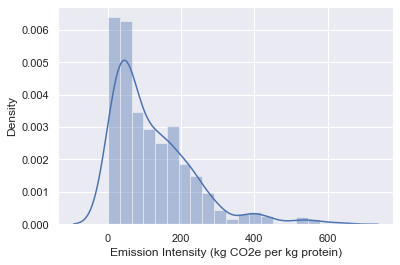

In [157]:
sns.distplot(GLEAM1['Emission Intensity (kg CO2e per kg protein)'])

In [158]:
GLEAM1['Emission Intensity (kg CO2e per kg protein)SQRT'] = np.sqrt(GLEAM1['Emission Intensity (kg CO2e per kg protein)'])
GLEAM1.head()

,Animal species,Production system,Emission Intensity (kg CO2e per kg protein),Production (kg protein),Total GHG emissions (kg CO2e),Total CO2 emissions (kg CO2e),Total CH4 emissions (kg CO2e),Total N2O emissions (kg CO2e),"Feed, CO2 (kg CO2e)","Feed, CH4 (kg CO2e)","Feed: fertilizer & crop residues, N2O (kg CO2e)","Feed: applied & deposited manure, N2O (kg CO2e)","Enteric fermentation, CH4 (kg CO2e)","Manure management, CH4 (kg CO2e)","Manure management, N2O (kg CO2e)","Direct energy, CO2 (kg CO2e)","Indirect energy, CO2 (kg CO2e)","Postfarm, CO2 (kg CO2e)",Emission Intensity (kg CO2e per kg protein)SQRT
0,Cattle,Aggregated,160.3,2.916310e+10,4.670000e+12,9.450000e+11,2.650000e+12,1.080000e+12,3.530000e+11,NaN,1.740000e+11,7.420000e+11,2.510000e+12,1.390000e+11,1.650000e+11,4.215542e+10,1.585653e+10,9.955932e+10,12.660964
1,Cattle,Aggregated,86.7,1.888089e+10,1.640000e+12,2.760000e+11,9.680000e+11,3.940000e+11,1.380000e+11,NaN,7.166208e+10,2.540000e+11,8.860000e+11,8.200906e+10,6.813278e+10,2.993485e+10,3.252889e+09,8.929544e+10,9.311283
2,Cattle,Aggregated,295.4,1.028222e+10,3.040000e+12,6.690000e+11,1.680000e+12,6.870000e+11,2.150000e+11,NaN,1.020000e+11,4.880000e+11,1.620000e+12,5.744310e+10,9.678019e+10,1.222057e+10,1.260364e+10,1.026388e+10,17.187205
3,Cattle,Grassland systems,206.3,1.033817e+10,2.130000e+12,5.630000e+11,1.050000e+12,5.170000e+11,1.110000e+11,NaN,5.253660e+10,4.270000e+11,9.970000e+11,5.605552e+10,3.798508e+10,1.417326e+10,4.303272e+09,3.773092e+10,14.363147
4,Cattle,Grassland systems,95.0,6.940654e+09,6.590000e+11,9.286140e+10,3.710000e+11,1.950000e+11,4.404003e+10,NaN,2.156126e+10,1.590000e+11,3.370000e+11,3.444428e+10,1.473188e+10,1.078605e+10,9.998435e+08,3.462338e+10,9.746794


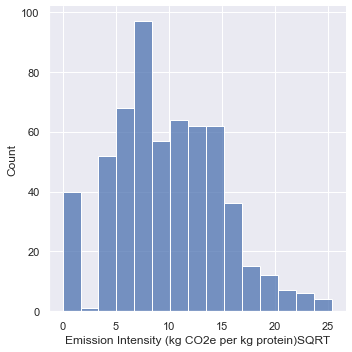

In [159]:
sns.displot(GLEAM1['Emission Intensity (kg CO2e per kg protein)SQRT'])

# Homogeneity of Variance

In [160]:
scipy.stats.bartlett(GLEAM1['Emission Intensity (kg CO2e per kg protein)SQRT'], GLEAM1['Total N2O emissions (kg CO2e)'])

BartlettResult(statistic=26431.863878679815, pvalue=0.0)

## Recording the IV to Numeric

In [161]:
def recode(series):
    if series == "Cattle":
        return 0
    if series == "Buffaloes":
        return 1
    if series == "Sheep":
        return 2
    if series == "Goats":
        return 3
    if series == "Pigs":
        return 4
    if series == "Chicken":
        return 5
    
GLEAM1['Animal speciesR'] = GLEAM1['Animal species'].apply(recode)

In [162]:
scipy.stats.fligner(GLEAM1['Emission Intensity (kg CO2e per kg protein)SQRT'], GLEAM1['Animal speciesR'])

FlignerResult(statistic=328.68941557916804, pvalue=1.854539507373576e-73)

## sample size

In [163]:
GLEAM1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 20 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Animal species                                   583 non-null    object 
 1   Production system                                583 non-null    object 
 2   Emission Intensity (kg CO2e per kg protein)      583 non-null    float64
 3   Production (kg protein)                          543 non-null    float64
 4   Total GHG emissions (kg CO2e)                    543 non-null    float64
 5   Total CO2 emissions (kg CO2e)                    543 non-null    float64
 6   Total CH4 emissions (kg CO2e)                    543 non-null    float64
 7   Total N2O emissions (kg CO2e)                    543 non-null    float64
 8   Feed, CO2 (kg CO2e)                              543 non-null    float64
 9   Feed, CH4 (kg CO2e)             

<AxesSubplot:>

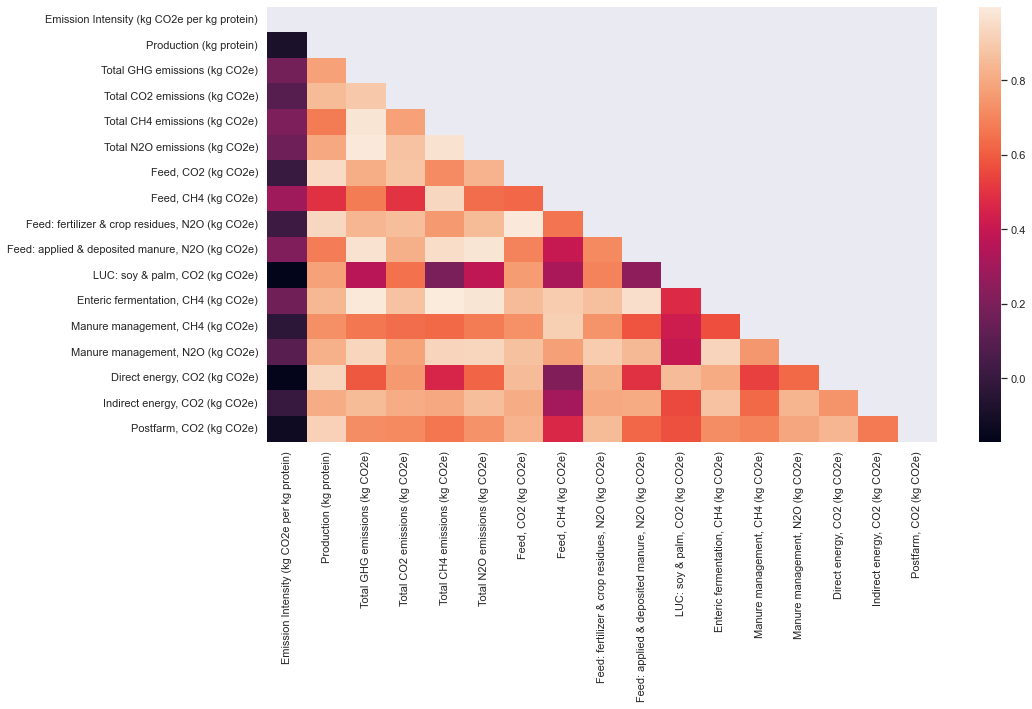

In [164]:
sns.set(rc = {'figure.figsize':(15,8)})
corr = GLEAM.drop('LUC: pasture expansion, CO2 (kg CO2e)',axis=1).corr()
sns.heatmap(corr, mask = np.triu(corr))

# Decision Matrix

In [171]:
x = GLEAM1[['Emission Intensity (kg CO2e per kg protein)', 'Emission Intensity (kg CO2e per kg protein)SQRT']]
y = GLEAM1['Animal species']

In [172]:
x.head()

,Emission Intensity (kg CO2e per kg protein),Emission Intensity (kg CO2e per kg protein)SQRT
0,160.3,12.660964
1,86.7,9.311283
2,295.4,17.187205
3,206.3,14.363147
4,95.0,9.746794


In [173]:
y.head()

0    Cattle
1    Cattle
2    Cattle
3    Cattle
4    Cattle
Name: Animal species, dtype: object

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [175]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [176]:
decisionTree = DecisionTreeClassifier(random_state=76)
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=76)

In [177]:
treePredictions = decisionTree.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, treePredictions))
print(classification_report(y_test, treePredictions))

[[16  7  0  3  0  3]
 [ 5 17  1  2  3  7]
 [ 0  1 39  0  1  0]
 [ 2  8  1 12  2  7]
 [ 1  0  5  0  4  0]
 [ 7  5  0  5  1 10]]
              precision    recall  f1-score   support

   Buffaloes       0.52      0.55      0.53        29
      Cattle       0.45      0.49      0.47        35
     Chicken       0.85      0.95      0.90        41
       Goats       0.55      0.38      0.44        32
        Pigs       0.36      0.40      0.38        10
       Sheep       0.37      0.36      0.36        28

    accuracy                           0.56       175
   macro avg       0.52      0.52      0.51       175
weighted avg       0.55      0.56      0.55       175



# Random Forest Prediction

In [179]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()

In [180]:
print(accuracy_score(y_test, forest.predict(x_test)))

0.5542857142857143


In [181]:
print(accuracy_score(y_test, forest.predict(x_test)))

0.5542857142857143


In [182]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[16  7  0  3  0  3]
 [ 5 17  1  2  3  7]
 [ 0  1 38  0  2  0]
 [ 1  8  1 12  2  8]
 [ 1  0  5  0  4  0]
 [ 7  5  0  5  1 10]]
              precision    recall  f1-score   support

   Buffaloes       0.53      0.55      0.54        29
      Cattle       0.45      0.49      0.47        35
     Chicken       0.84      0.93      0.88        41
       Goats       0.55      0.38      0.44        32
        Pigs       0.33      0.40      0.36        10
       Sheep       0.36      0.36      0.36        28

    accuracy                           0.55       175
   macro avg       0.51      0.52      0.51       175
weighted avg       0.55      0.55      0.55       175



In [184]:
from sklearn.model_selection import RandomizedSearchCV

In [185]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.49142857142857144
4 : 0.5371428571428571
5 : 0.5257142857142857
8 : 0.5257142857142857
10 : 0.5314285714285715
20 : 0.5428571428571428
50 : 0.5542857142857143
75 : 0.5542857142857143
100 : 0.5542857142857143
250 : 0.5485714285714286
500 : 0.5485714285714286


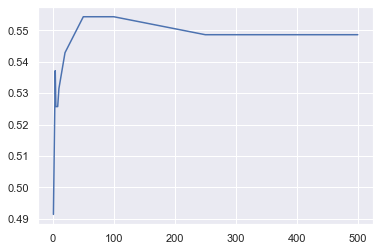

In [186]:
plt.plot(n_estimators_array, results)